# 4. Rapidly Exploring Random Tree: Excercise

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from random import randint

## Upload the image angiography.jpg

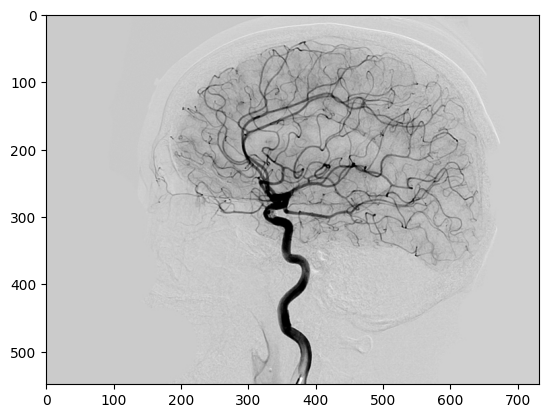

In [2]:
# Load the image “angiography.jpg”
cdata = cv2.imread('angiography.jpg')
plt.imshow(cdata)

## Some preprocessing ;)

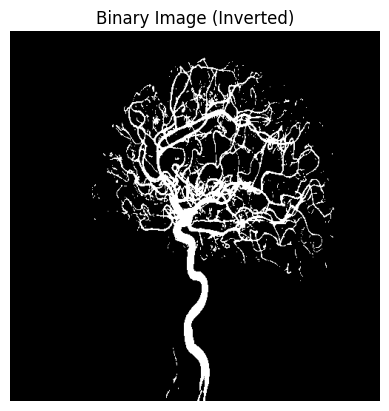

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Resize the image to a resolution of 500x500
desired_resolution = (500, 500)
resized_image = cv2.resize(cdata, desired_resolution)

# Convert the image into a grayscale image
I = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Binarize the image
# Pixels with values > 127 are set to 1, others to 0
_, BW = cv2.threshold(I, 0.6 * 255, 255, cv2.THRESH_BINARY)

# Normalize the binary image to values of 0 and 1
BW = (BW / 255).astype(np.uint8)

# Invert the binary image
BW2 = 1 - BW  # Converts 1s to 0s and 0s to 1s

# Show the binary image
plt.imshow(BW2, cmap='gray')
plt.title("Binary Image (Inverted)")
plt.axis('off')
plt.show()


## RRT Function

In [4]:
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.parent = None

def distance(a, b):
    return np.sqrt((a.x - b.x)**2 + (a.y - b.y)**2)

def rand_node(w, h):
    return Node(randint(0, w - 1), randint(0, h - 1))

def closest_node(node, nodes):
    close_nodes = sorted(nodes, key=lambda n: distance(node, n))
    return close_nodes[0]

def new_node(direction, close_point, step=10):
    dist = distance(direction, close_point)
    if dist > step:
        prop_x = close_point.x + (direction.x - close_point.x) * step / dist
        prop_y = close_point.y + (direction.y - close_point.y) * step / dist
        return Node(int(prop_x), int(prop_y))
    else:
        return direction

def collision(node, map):
    return map[int(node.y), int(node.x)] == 0

def rrt(map, start, end, iteration=5000, step=8):
    w, h = map.shape
    start_node = Node(start[0], start[1])
    end_node = Node(end[0], end[1])
    nodes = [start_node]
    every_nodes = [start_node]  # Variable to save all nodes

    for i in range(iteration):
        rnd_node = rand_node(w, h) if randint(0, 100) > 50 else end_node
        close_node = closest_node(rnd_node, nodes)
        new_prop_node = new_node(rnd_node, close_node, step)

        if not collision(new_prop_node, map):
            new_prop_node.parent = close_node
            nodes.append(new_prop_node)
            every_nodes.append(new_prop_node)  # Add the new node to the list of all nodes

            if distance(new_prop_node, end_node) < step:
                end_node.parent = new_prop_node
                nodes.append(end_node)
                every_nodes.append(end_node)  # Add the final node if reached
                break

    path = []
    current_node = end_node
    while current_node.parent is not None:
        path.append((current_node.x, current_node.y))
        current_node = current_node.parent
    path.append((start_node.x, start_node.y))

    return path[::-1], every_nodes  # Returns both the route and all nodes



## Set start and end point and compute the path thorugh the rrt 

In [5]:
# Let's stick to these start and target point
start = (260, 450)
end = (350, 100)

# Run RRT and get all nodes
path, every_nodes = rrt(BW2, start, end)


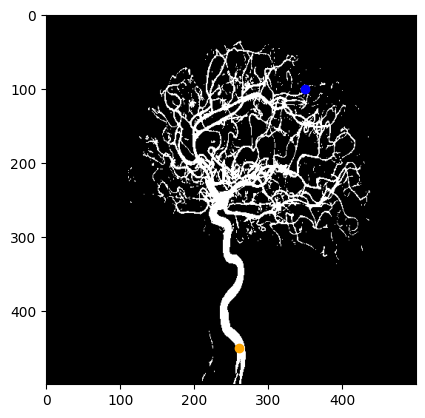

In [6]:
plt.imshow(BW2, cmap='gray')
plt.scatter(260, 450, color='orange', marker='o', label='Start')
plt.scatter(350, 100, color='blue', marker='o', label='End')


## Drawing the RRT tree

In [7]:
import numpy as np

def check_non_binary_pixels(image):
    """
    Function to check if there are any non-binary pixel values in the image.
    
    Parameters:
    - image (numpy array): Input image to check.
    
    Returns:
    - bool: True if non-binary pixels are found, False otherwise.
    - list: A list of unique non-binary pixel values.
    """
    unique_values = np.unique(BW2)
    non_binary_values = [value for value in unique_values if value not in [0, 1]]
    
    if non_binary_values:
        return True, non_binary_values
    return False, []

# Example usage
# Assume `image` is your input image
# image = cv2.imread("path_to_image", cv2.IMREAD_GRAYSCALE)  # Load your grayscale image

is_non_binary, non_binary_values = check_non_binary_pixels(BW2)

if is_non_binary:
    print("The image contains non-binary pixel values:", non_binary_values)
else:
    print("The image is binary (contains only 0s and 1s).")


The image is binary (contains only 0s and 1s).


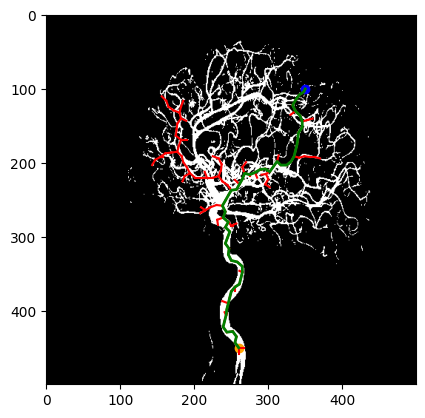

In [8]:
# Draw tree
def draw_tree(nodes):
    plt.imshow(BW2, cmap='gray', origin='lower')
    for node in nodes:
        if node.parent:
            plt.plot([node.x, node.parent.x], [node.y, node.parent.y], 'r-')

# Draw path
def draw_path(path):
    plt.imshow(BW2, cmap='gray', origin='lower')
    xs, ys = zip(*path)  # Create separate lists for x and y co-ordinates
    plt.plot(xs, ys, 'g-', linewidth=2)

# Draw the tree and the path
draw_tree(every_nodes)
draw_path(path)

plt.scatter(start[0], start[1], color='orange', marker='o', label='Start')
plt.scatter(end[0], end[1], color='blue', marker='o', label='End')

plt.gca().invert_yaxis()
plt.show()
